In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Definition of the target

# possible target sizes: 800mm, 600mm, 400mm
target_size = 800

In [3]:
def create_random_round (target_size, number_of_shots):
    radius = target_size/2
    shots = []
    
    for i in range(number_of_shots):
        shots.append([random.randint(-radius,radius),random.randint(-radius,radius)]) #x- and y-coordiante for each shot
    
    return pd.DataFrame(shots,columns='x y'.split())

In [4]:
def calc_distance(x_y_value):
    distance = np.sqrt(np.square(x_y_value[0])+np.square(x_y_value[1])) # Pythagorean theorem
    return distance

In [5]:
def get_distance_limits(target_size):
    # Determine how many milimeters the single rings are apart
    radius = target_size/2
    step_size = radius/10
    distance_limits = []
    
    distance_limits.append(step_size/2)  # first entry for the ring of x-ten (this is half step-size of all others)
                                            # this array then gets extend by the other limits
                                            
    
    
    for i in range(10):
            distance_limits.append(step_size*(i+1))
            
    return distance_limits

In [6]:
def write_score_one_shot(target_size, distance_from_center):
    
    distance_limits = get_distance_limits(target_size)
        
    points = 0
    x_ten = False
    
    arr_points = []
    arr_x_ten = []
    
    #X_ten
    if distance_from_center <= (distance_limits[0] + 2): # +2mm to take the thickness of the arrow into account
        points = 10
        x_ten = True
    
    else:
        for i in range(10):
            if distance_from_center <= (distance_limits[10-i] + 2): # +2mm to take the thickness of the arrow into account
                points = (i+1)
                x_ten = False
    
    return points, x_ten

In [7]:
def write_score_round(target_size, df_round):
    arr_points = []
    arr_x_ten = []
    
    for i in range(len(df_round)):
        arr_points.append(write_score_one_shot(target_size,calc_distance(df_round.iloc[i]))[0])
        arr_x_ten.append(write_score_one_shot(target_size,calc_distance(df_round.iloc[i]))[1])
        
    scoreboard = pd.DataFrame([arr_points, arr_x_ten],index='points x_ten'.split()).transpose()
    
    return scoreboard

In [8]:
def get_result(scoreboard):
    #sum_points = 0
    
    #for i in range(len(scoreboard)):
        #sum_points += scoreboard.iloc[i][0]
        #frequency_x_ten += 
    
    sum_points = scoreboard['points'].sum()
    frequnecy_x_ten = scoreboard['x_ten'].sum()
    
    return sum_points, frequnecy_x_ten

In [9]:
#Create random round at target size 800mm and 6 arrows


target_size = 800
num_of_shots = 6

random_round = create_random_round(target_size, num_of_shots)
random_round

,x,y
0,74,331
1,-167,302
2,166,224
3,388,-215
4,-189,-22
5,146,-48


In [10]:
scoreboard = write_score_round(target_size, random_round)
scoreboard

,points,x_ten
0,2,False
1,2,False
2,4,False
3,0,False
4,6,False
5,7,False


In [11]:
result = get_result(scoreboard)
print("You reached {0} points and got {1} X-Tens".format(result[0],result[1]))

You reached 21 points and got 0 X-Tens


(-453.3333333333333, 453.3333333333333)

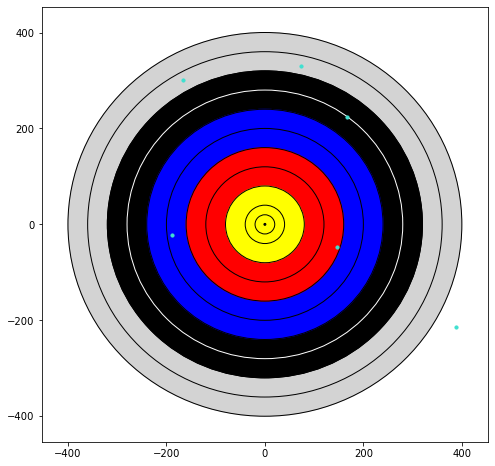

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
    
colors = ['yellow','yellow','yellow','red','red','blue','blue','black','black','lightgrey','lightgrey']
distance_limits = get_distance_limits(target_size)

for i in range(11):
    ax.add_patch(plt.Circle((0,0),(distance_limits[10-i]),color=colors[10-i],fill=True,zorder=1))
    ax.add_patch(plt.Circle((0,0),(distance_limits[10-i]),edgecolor='black',fill=False,zorder=2))
ax.add_patch(plt.Circle((0,0),distance_limits[7],edgecolor='white',fill=False,zorder=2))
ax.add_patch(plt.Circle((0,0),distance_limits[0]/10,color='black',fill=True,zorder=2))

plt.scatter(x=random_round['x'],y=random_round['y'],c='turquoise',s=10,zorder=3)

limits_of_fig = (target_size/2) + target_size/15
plt.xlim([-limits_of_fig,limits_of_fig])
plt.ylim([-limits_of_fig,limits_of_fig])

In [19]:
7+6+4+2+2

21